# Image Manipulation with skimage

This example builds a simple UI for performing basic image manipulation with [scikit-image](http://scikit-image.org/).

In [21]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

In [22]:
import skimage
from skimage import data, filter, io

In [23]:
i = data.coffee()

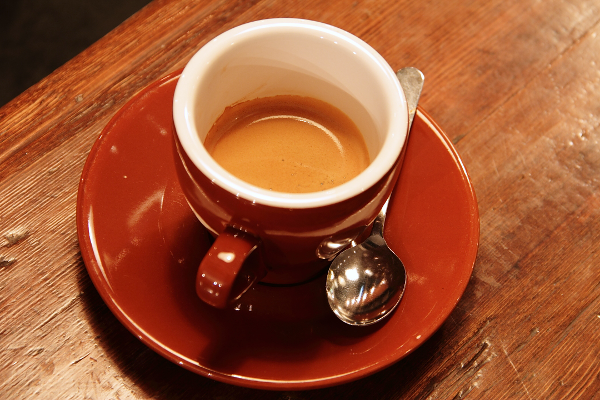

In [24]:
io.Image(i)

In [25]:
def edit_image(image, sigma=0.1, r=1.0, g=1.0, b=1.0):
    new_image = filter.gaussian_filter(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    new_image = io.Image(new_image)
    display(new_image)
    return new_image

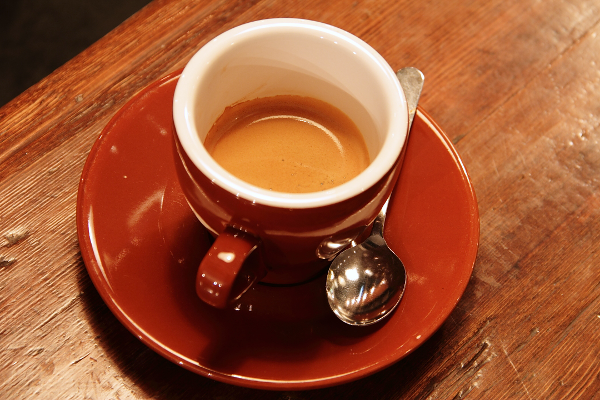

In [26]:
lims = (0.0,1.0,0.01)
w = interactive(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), r=lims, g=lims, b=lims)
display(w)

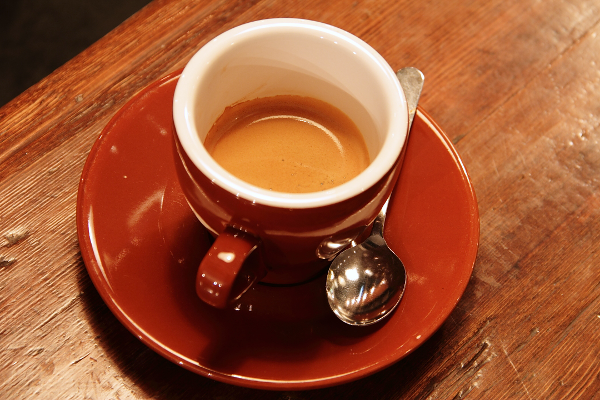

In [27]:
w.result

## Python 3 only: Function annotations

In Python 3, you can use the new function annotation syntax to describe widgets for interact:

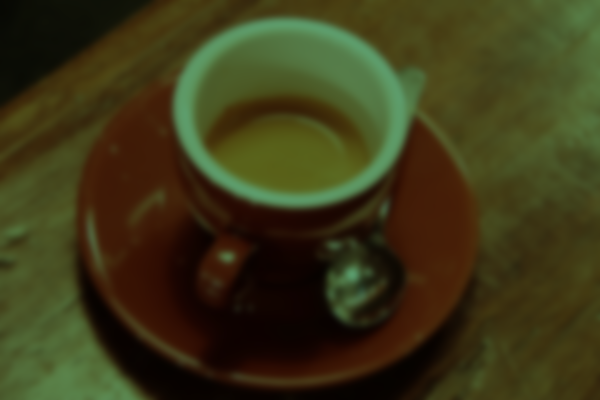

In [28]:
lims = (0.0,1.0,0.01)

@interact
def edit_image(image: fixed(i), sigma:(0.0,10.0,0.1)=0.1, r:lims=1.0, g:lims=1.0, b:lims=1.0):
    new_image = filter.gaussian_filter(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    new_image = io.Image(new_image)
    display(new_image)
    return new_image